This is a program to calculate the Whissell values for a string of text around a particular target word. That means finding the word, getting the # words before and behind, replacing them with the Whissel Dictionary numbers, then averaging them. To use on your text, change the variables to your desired text location, target word, and target window size (the window size is actually half the length of the full window size). I use the text of The Waves because I already have it. I used WordSmith Tools to doublecheck concordance accuracy and context accuracy. The re.sub routines first save out text and apostrophes, then remove apostrophes (single quotes) preceded or followed by a space. Thus only apostrophes inside words remain. This is important for The Waves but might need fiddling for other texts. 

In [24]:
import re
import nltk
import matplotlib.pyplot as plt
from statistics import mean

targetDoc = "texts/waves.txt"     # the text to analyze (relative path)
targetWord = "bird"               # the word type you want to score
targetWindow = 6                  # this is tokens before and after target

doc = open(targetDoc, 'r').read()                  # open source text
doc_words = re.sub("[^a-zA-Z']"," ", doc)          # save only text and apostrophes
doc_words = re.sub("('\s|\s')"," ", doc_words).lower().split()     # remove apostrophes outside words
doc_text = nltk.Text(doc_words)
myword = doc_text.concordance(targetWord)          # print a concordance of the word to eye results
print(myword)


Displaying 25 of 26 matches:
eaf transparent and then another one bird chirped high up there was a pause an
ole in the hedge i thought that is a bird on its nest i parted them and looked
ted them and looked but there was no bird on a nest the leaves went on moving 
s are wild my lips tight pressed the bird flies the flower dances but i hear a
d ribbons sprinkle the wallpaper the bird chorus is over only one bird now sin
per the bird chorus is over only one bird now sings close to the bedroom windo
hat i say crowding like a fluttering bird one sentence crosses the empty space
 if it shattered the song of another bird with harsh discord their round eyes 
le experiences so dear to the callow bird with a yellow tuft on its beak now c
descending on the tree tops here one bird taking its way alone made wing for t
or hot muzzle seethed in the water a bird perched on an ash coloured twig sipp
ping over the ploughed land and some bird singing perhaps some intoxicated lar
ems as if no leaf would

    c = nltk.ConcordanceIndex(doc_text.tokens, key = lambda s: s.lower())
basically indexes the words for every token of the text. The 'offset' function returns the list of token offset positions for a word. (c.\_tokens) is the list of words, so a subscript of that will access the exact word at that position. 
Next, open the DA file and read it into a dictionary. Each line is split so the word is the key and the three Whissell numbers is the value. Lookup is simple: get(key) returns value: daffect.get(c.\_tokens[335]). Then split the value strings into three floating point numbers because math.

In [25]:
c = nltk.ConcordanceIndex(doc_text.tokens, key = lambda s: s.lower())
locations = c.offsets(targetWord)

with open("texts/DAL.txt") as dictionary_affect_file:
   daffect = dict(line.rstrip().split(",", 1) for line in dictionary_affect_file)

alleevals = []                   #prepare lists of vals for every token found in text
allaavals = []
alliivals = []
allNonelist = []                 # keep all nonelist for token report
allAvgeevals = []                # keep list of avg vals for plotting
allAvgaavals = []
allAvgiivals = []

for location in locations:       #iterate over list of concordance hit offsets
    print (c._tokens[location], "offset =", location)
    phrase = []                  #keep a list of tokens in the phrase
    nonelist = []                #new val lists for each interation of a location
    eevals = []
    aavals = []
    iivals = []     
    for i in range(0-targetWindow, 1+targetWindow):        #iterate over range from target offset, range extends up to but no including
        #print (c._tokens[location+i], daffect.get(c._tokens[location+i]))
        #print (c._tokens[location-i], daffect.get(c._tokens[location-i]))
        phrase.append(c._tokens[location+i]) 
         
        if daffect.get(c._tokens[location+i]) is None:
            nonelist.append(c._tokens[location+i])         # prepare report of words not in DAL
        else:
            eeval, aaval, iival = daffect.get(c._tokens[location+i]).split(",")
            eevals.append(float(eeval))                    # have to convert these to fp numbers
            aavals.append(float(aaval))
            iivals.append(float(iival))
            #print (c._tokens[location+i], "eevals = ", eevals)
            #print ("eevals length =",len(eevals))
            
    alleevals.extend(eevals)                 #add vals from this token onto alltokens list
    allaavals.extend(aavals)                 #to calculate mean of alltokens 
    alliivals.extend(iivals)                 #problem: target word values get added each time
    allNonelist.extend(nonelist)
    #print (alleevals) #check to see
    
    avgeevals = round(mean(eevals), 4)       # rounded to 4 decimal places like Whissell
    avgaavals = round(mean(aavals), 4)       # rounded to 4 decimal places like Whissell
    avgiivals = round(mean(iivals), 2)       # rounded to 2 decimal places like Whissell
    
    allAvgeevals.append(avgeevals - 1.85)  # .extend causes a TypeError: 'float' object is not iterable
    allAvgaavals.append(avgaavals - 1.67)  # We subtract the balanced corpus mean to display variance
    allAvgiivals.append(avgiivals - 1.525)
    
    # here follow the token reports: all the words, the No Vals list, and the scores
    print (" ".join(word for word in phrase))
    print ("No Values for", nonelist)
    print ("EE =", avgeevals, "AA =", avgaavals, "II =", avgiivals, "\n") 

hitratio = 100*round((len(alleevals) / (len(alleevals) + len(allNonelist))), 2) #change rounding num if desired
meanTotaleevals = round(mean(alleevals), 4)
meanTotalaavals = round(mean(allaavals), 4)
meanTotaliivals = round(mean(alliivals), 2)

# here follow the type reports: the target word, its score, and the hit ration. Need anything else?
print ("Type Means for", targetWord) 
print ("EE =", meanTotaleevals)
print ("AA =", meanTotalaavals)
print ("II =", meanTotaliivals)
print ("No values for", list(sorted(set(allNonelist))))
print ("Hit Ratio = %",hitratio)
    


bird offset = 333
leaf transparent and then another one bird chirped high up there was a
No Values for ['chirped']
EE = 1.8477 AA = 1.6613 II = 1.72 

bird offset = 1399
hedge i thought that is a bird on its nest i parted them
No Values for ['hedge', 'parted']
EE = 1.9613 AA = 1.639 II = 1.55 

bird offset = 1412
and looked but there was no bird on a nest the leaves went
No Values for []
EE = 1.739 AA = 1.7061 II = 1.52 

bird offset = 13918
wild my lips tight pressed the bird flies the flower dances but i
No Values for []
EE = 2.0304 AA = 1.7952 II = 2.0 

bird offset = 24318
faded ribbons sprinkle the wallpaper the bird chorus is over only one bird
No Values for ['ribbons', 'wallpaper']
EE = 1.721 AA = 1.6181 II = 1.96 

bird offset = 24324
bird chorus is over only one bird now sings close to the bedroom
No Values for []
EE = 1.8037 AA = 1.6231 II = 1.89 

bird offset = 26341
i say crowding like a fluttering bird one sentence crosses the empty space
No Values for ['crowding', 'flutte

Next step is to display values for each word plotted over the book. We follow her methodology as first guesstimate. "The mean of all values for a sample characterizes the sample as a whole" (Whissell 2009, 515). She takes the mean for all word sets involved. For _Much Ado about Nothing_ she takes total speeches from each character (p. 516) and compares values to compare characters. In her other test she examines a police-involved shooting in Ireland, the speech of the shooter and of the later police report. There she focuses on the extreme ends of the emotion scales, and the method is not quite clear. She refers to a 2007 article on "Ruth" that clarifies nothing--she compares to "normative" numbers of strong emotion words in her 1998 corpus but does not provide those numbers anywhere that I found. 
Display: from header of DAL: on a balanced corpus, mean ee is 1.85, with an sd of .36. So, if we subtract 1.85 from our eevals we will get the distance positive or negative from the mean. Lets try it.
Adjustment: plt.plot by itself adjusts display axis to data. This makes comparing graphs impossible. So we will fix the y-axis values so every display is comparable. Max val is 3, min is 1. ee has highest mean. This means the max value of 3-1.85=1.15, min val is 1-1.85=-0.85. ii has smallest mean--3-1.525=1.475, min is 1-1.525=-0.525. Thus max ii and min ee should set the scale. In practice, though, no display gets to those extremes because of the effects of function words. So we will arbitrarily go with -0.5 and 1. If vals go off the charts somewhere we will change it.

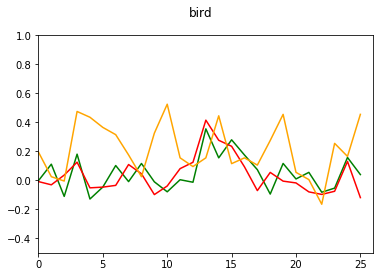

In [41]:
plt.plot(allAvgeevals, 'g', allAvgaavals, 'r', allAvgiivals, 'orange')
plt.axis([0, len(allAvgeevals), -.5, 1])
plt.suptitle(targetWord)
plt.show()